In [1]:
import gymnasium as gym
import numpy as np
from littlezoo import LittleZoo

In [2]:
env = LittleZoo()

In [31]:
env.env_params['categories']['carnivore']

('lion', 'tiger', 'bobcat', 'panthera', 'coyote', 'wolf')

In [16]:
goal = ['Grow lion', 'tomato', 'water', 'rabbit', 'lion']

In [17]:
env.reset(goal)

('You see: tomato seed, water, baby rabbit, baby lion\nYou are standing on: nothing\nInventory (0/2): empty',
 {'goal': 'Grow lion',
  'possible_actions': ['Grasp',
   'Go to tomato seed',
   'Go to water',
   'Go to baby rabbit',
   'Go to baby lion'],
  'inventory': []})

In [28]:
env.step("Release rabbit")

('You see: lion\nYou are standing on: lion\nInventory (0/2): empty',
 1.0,
 True,
 False,
 {'goal': 'Grow lion',
  'possible_actions': ['Grasp', 'Go to lion'],
  'inventory': []})

In [12]:
nb_grasp = 0
nb_grow = 0
for desc in env.train_descriptions:
    if desc.startswith("Grasp"):
        nb_grasp += 1
    else:
        nb_grow += 1

print(nb_grasp/(nb_grasp+nb_grow), nb_grow/(nb_grasp+nb_grow))

0.5048543689320388 0.49514563106796117


In [64]:
from tqdm import tqdm
for i in tqdm(range(100000)):
    env.reset(np.random.choice(env.test_descriptions))

  5%|▌         | 5347/100000 [02:15<39:52, 39.56it/s]


KeyboardInterrupt: 

In [19]:
len(objects)

13

In [7]:
2 * 13 * 715

18590

In [28]:
furnitures = ('door', 'chair', 'table')
plants = ('potato', 'carrot', 'tomato')
herbivores = ('rabbit', 'pig', 'sheep')
carnivores = ('lion', 'tiger', 'wolf')
supplies = ('water',)

objects = furnitures + plants + herbivores + carnivores + supplies

impossibles = []
grasp = []
grow_plants = []
grow_herbivores = []
grow_carnivores = []
for i, e1 in enumerate(objects):
    for j, e2 in enumerate(objects[i+1:]):
        for k, e3 in enumerate(objects[i+j+2:]):
            for e4 in objects[i+j+k+3:]:
                for o in objects:
                    g = ''
                    for t in ('Grasp', 'Grow'):
                        g += f'Goal: {t} {o}\n'
                        g += f'You see: {e1}, {e2}, {e3}, {e4}\n'
                        g += 'You are standing on: nothing\n'
                        g += 'Inventory (0/2): empty\n'
                        g += 'Action: '
                        
                        # Impossible goals
                        if o not in (e1, e2, e3, e4) or t == 'Grow' and (o in furnitures + supplies or 'water' not in (e1, e2, e3, e4) or o in herbivores + carnivores and e1 not in plants and e2 not in plants and e3 not in plants and e4 not in plants or o in carnivores and e1 not in herbivores and e2 not in herbivores and e3 not in herbivores and e4 not in herbivores):
                            impossibles.append(g)
                        elif t == 'Grasp':
                            grasp.append(g)
                        elif o in plants:
                            grow_plants.append(g)
                        elif o in herbivores:
                            grow_herbivores.append(g)
                        elif o in carnivores:
                            grow_carnivores.append(g)
                        else:
                            print(g)
                                
all_goals = impossibles + grasp + grow_plants + grow_herbivores + grow_carnivores
len(all_goals)

18590

In [29]:
print(len(impossibles), len(grasp), len(grow_plants), len(grow_herbivores), len(grow_carnivores))

15457 2860 165 81 27


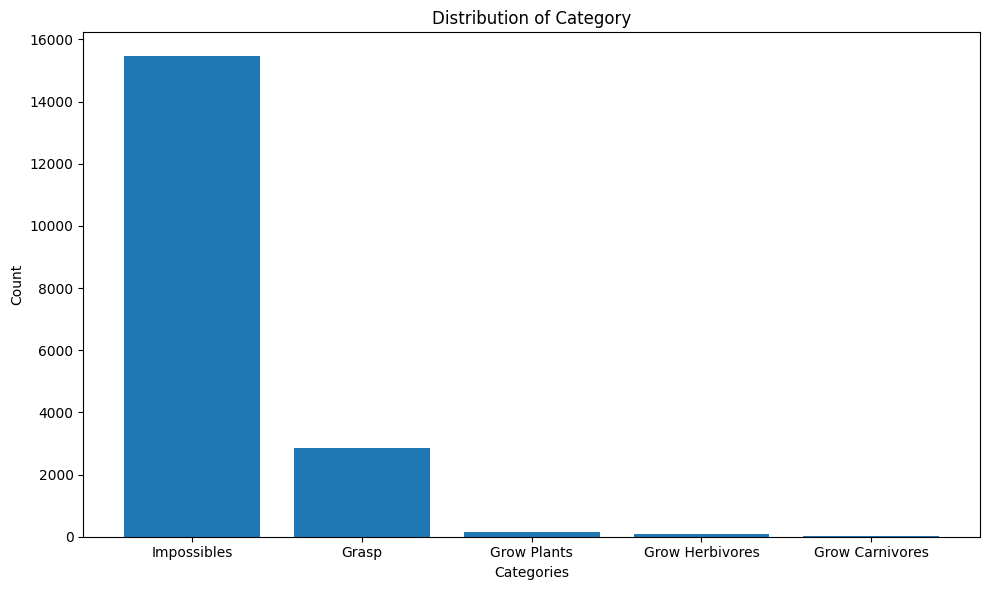

In [30]:
from matplotlib import pyplot as plt
categories = ['Impossibles', 'Grasp', 'Grow Plants', 'Grow Herbivores', 'Grow Carnivores']
values = [len(impossibles), len(grasp), len(grow_plants), len(grow_herbivores), len(grow_carnivores)]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(categories, values)
plt.title('Distribution of Category')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.tight_layout()
plt.show()